In [30]:
from sklearn.decomposition import PCA
from PIL import Image 
import os
import numpy as np

source = "imgs"
train_data = []
file_names = []
for filename in os.listdir(source):
    dst = source + "/" + filename
    file_names.append(dst)
    train_data.append(np.array(Image.open(dst, 'r')).flatten())

pca = PCA(n_components=100)
pca.fit(train_data)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [31]:
import pickle
with open('pca.pkl', 'wb') as pickle_file:
    pickle.dump(pca, pickle_file)

In [32]:
with open('pca.pkl', 'rb') as pickle_file:
    pca = pickle.load(pickle_file)
test = []
test.append(np.array(Image.open("imgs/11.pgm", 'r')).flatten())
test_features = pca.transform(test)
train_features = pca.transform(train_data)

In [107]:
print(test[0].shape)

(16384,)


In [34]:
print(train_features.shape)

(365, 100)


In [35]:
def euclidean(v1, v2):
    return sum((p-q)**2 for p, q in zip(v1, v2)) ** .5

In [36]:
dist = []
for i in train_features:
    foo = euclidean(i, test_features[0])
    dist.append(foo)


In [42]:
result = list(zip(train_data, dist))

In [52]:
print(result[1][0].shape)
print(128*128)

(16384,)
16384


In [126]:
result.sort(key=lambda x: x[1])
print(result[:5])

[(array([202, 201, 197, ...,  72,  73,  75], dtype=uint8), 1.0851795771933544e-12), (array([170, 174, 174, ..., 157, 159, 126], dtype=uint8), 2453.1108888641634), (array([164, 165, 163, ...,  63,  63,  62], dtype=uint8), 3213.211375933512), (array([106, 118, 171, ..., 113, 145, 130], dtype=uint8), 3962.8564776097087), (array([235, 181, 174, ..., 133, 134, 190], dtype=uint8), 3993.5952725709135)]


In [131]:
print(result[-1])
images = []
for i in range(8):
    images.append(result[i][0])

(array([22, 20, 19, ..., 67, 41, 29], dtype=uint8), 13161.127375258013)


In [132]:
import matplotlib.pyplot as plt

def plot_gallery(images, h, w, rows=2, cols=4):
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
#         print(images[i].shape)

([], <a list of 0 Text yticklabel objects>)

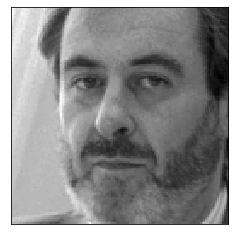

In [133]:
plt.figure()
plt.imshow(test[0].reshape((128, 128)), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())

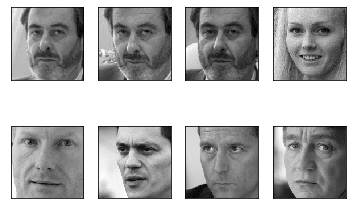

In [134]:
plot_gallery(images, 128, 128)